# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
OPTIMIZER = [keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adagrad, keras.optimizers.Adam]

In [7]:
results = {}
for lr, opti in itertools.product(LEARNING_RATE, OPTIMIZER):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Optimizer = %s" % (lr, str(opti)))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    #optimizer = keras.optimizers.opti(lr=lr, nesterov=True)
    optimizer = opti(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s-optimizer-%s" % (str(lr), str(opti))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.SGD'>
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
____________________________________________________

50000/50000 [==============================] - 6s 125us/step - loss: 0.7969 - acc: 0.7136 - val_loss: 1.6421 - val_acc: 0.5077
Epoch 48/50
50000/50000 [==============================] - 6s 126us/step - loss: 0.7936 - acc: 0.7170 - val_loss: 1.7046 - val_acc: 0.4922
Epoch 49/50
50000/50000 [==============================] - 7s 141us/step - loss: 0.7695 - acc: 0.7274 - val_loss: 1.6100 - val_acc: 0.5007
Epoch 50/50
50000/50000 [==============================] - 6s 123us/step - loss: 0.7438 - acc: 0.7349 - val_loss: 1.8343 - val_acc: 0.4803
Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.RMSprop'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
________________________________________________

50000/50000 [==============================] - 8s 154us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 48/50
50000/50000 [==============================] - 8s 154us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 8s 154us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 8s 154us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.Adagrad'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
________________________________________

50000/50000 [==============================] - 7s 148us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 48/50
50000/50000 [==============================] - 7s 148us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 7s 148us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 7s 148us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.Adam'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
___________________________________________

50000/50000 [==============================] - 9s 173us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 48/50
50000/50000 [==============================] - 9s 174us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 9s 173us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 9s 173us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 0.010000, Optimizer = <class 'keras.optimizers.SGD'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
____________________________________________

Epoch 48/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.2422 - acc: 0.5658 - val_loss: 1.3737 - val_acc: 0.5172
Epoch 49/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.2411 - acc: 0.5657 - val_loss: 1.4499 - val_acc: 0.4898
Epoch 50/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.2377 - acc: 0.5665 - val_loss: 1.4141 - val_acc: 0.4917
Experiment with LR = 0.010000, Optimizer = <class 'keras.optimizers.RMSprop'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
___________________________________________

50000/50000 [==============================] - 8s 154us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 8s 154us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 8s 154us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 0.010000, Optimizer = <class 'keras.optimizers.Adagrad'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________

50000/50000 [==============================] - 7s 149us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 7s 149us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 7s 148us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 0.010000, Optimizer = <class 'keras.optimizers.Adam'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
____________________________________________________

50000/50000 [==============================] - 9s 174us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 9s 174us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 9s 175us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 0.001000, Optimizer = <class 'keras.optimizers.SGD'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_____________________________________________________

Epoch 49/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.6843 - acc: 0.4134 - val_loss: 1.6897 - val_acc: 0.4116
Epoch 50/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.6803 - acc: 0.4141 - val_loss: 1.6869 - val_acc: 0.4127
Experiment with LR = 0.001000, Optimizer = <class 'keras.optimizers.RMSprop'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
__________________________________________________

Epoch 50/50
50000/50000 [==============================] - 8s 155us/step - loss: 0.7769 - acc: 0.7209 - val_loss: 2.1134 - val_acc: 0.4797
Experiment with LR = 0.001000, Optimizer = <class 'keras.optimizers.Adagrad'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-t

Experiment with LR = 0.001000, Optimizer = <class 'keras.optimizers.Adam'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 128us/step - loss: 2.3519 - acc: 0.1232 - val_loss: 2.3323 - val_acc: 0.1340
Epoch 2/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.3161 - acc: 0.1396 - val_loss: 2.3073 - val_acc: 0.1483
Epoch 3/50
50000/50000 [==============================] - 6s 121us/step - loss: 2.2966 - acc: 0.1528 - val_loss: 2.2911 - val_acc: 0.1593
Epoch 4/50
50000/50000 [==============================] - 6s 121us/step - loss: 2.2821 - acc: 0.1617 - val_loss: 2.2773 - val_acc: 0.1692
Epoch 5/50
50000/50000 [==============================] - 6s 121us/step - loss: 2.2687 - acc: 0.1693 - val_loss: 2.2640 - val_acc: 0.1782
Epoch 6/50
50000/50000 [==============================] - 6s 121us/step - loss: 2.2558 - acc: 0.1792 - val_loss: 2.2515 - val_acc: 0.1848
Epoch 7/50
50000/50000 [==============================] - 6s 121us/step - loss: 2.2437 - acc: 0.1870 - val_loss: 2.2399 - 

50000/50000 [==============================] - 8s 165us/step - loss: 1.9691 - acc: 0.2923 - val_loss: 1.9104 - val_acc: 0.3019
Epoch 2/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.7901 - acc: 0.3656 - val_loss: 1.7499 - val_acc: 0.3799
Epoch 3/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.7103 - acc: 0.3962 - val_loss: 1.6850 - val_acc: 0.3914
Epoch 4/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.6554 - acc: 0.4130 - val_loss: 1.7042 - val_acc: 0.3786
Epoch 5/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.6121 - acc: 0.4302 - val_loss: 1.6298 - val_acc: 0.4173
Epoch 6/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.5744 - acc: 0.4441 - val_loss: 1.6010 - val_acc: 0.4262
Epoch 7/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.5450 - acc: 0.4542 - val_loss: 1.5462 - val_acc: 0.4457
Epoch 8/50
50000/50000 [=====================

Epoch 2/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.9236 - acc: 0.3354 - val_loss: 1.8999 - val_acc: 0.3477
Epoch 3/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.8845 - acc: 0.3492 - val_loss: 1.8790 - val_acc: 0.3525
Epoch 4/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.8604 - acc: 0.3564 - val_loss: 1.8521 - val_acc: 0.3617
Epoch 5/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.8423 - acc: 0.3618 - val_loss: 1.8369 - val_acc: 0.3630
Epoch 6/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.8277 - acc: 0.3678 - val_loss: 1.8247 - val_acc: 0.3678
Epoch 7/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.8155 - acc: 0.3736 - val_loss: 1.8139 - val_acc: 0.3730
Epoch 8/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.8051 - acc: 0.3763 - val_loss: 1.8043 - val_acc: 0.3750
Epoch 9/50
50000/50000 [==========

Epoch 3/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.6348 - acc: 0.4235 - val_loss: 1.6024 - val_acc: 0.4384
Epoch 4/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.5769 - acc: 0.4442 - val_loss: 1.5604 - val_acc: 0.4553
Epoch 5/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.5332 - acc: 0.4600 - val_loss: 1.5207 - val_acc: 0.4589
Epoch 6/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.4992 - acc: 0.4709 - val_loss: 1.5038 - val_acc: 0.4651
Epoch 7/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.4636 - acc: 0.4872 - val_loss: 1.4895 - val_acc: 0.4752
Epoch 8/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.4379 - acc: 0.4945 - val_loss: 1.4777 - val_acc: 0.4706
Epoch 9/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.4121 - acc: 0.5021 - val_loss: 1.4469 - val_acc: 0.4870
Epoch 10/50
50000/50000 [=========

Epoch 4/50
50000/50000 [==============================] - 6s 121us/step - loss: 2.4237 - acc: 0.0880 - val_loss: 2.4186 - val_acc: 0.0843
Epoch 5/50
50000/50000 [==============================] - 6s 121us/step - loss: 2.4081 - acc: 0.0877 - val_loss: 2.4039 - val_acc: 0.0847
Epoch 6/50
50000/50000 [==============================] - 6s 121us/step - loss: 2.3947 - acc: 0.0885 - val_loss: 2.3913 - val_acc: 0.0851
Epoch 7/50
50000/50000 [==============================] - 6s 121us/step - loss: 2.3833 - acc: 0.0889 - val_loss: 2.3805 - val_acc: 0.0862
Epoch 8/50
50000/50000 [==============================] - 6s 120us/step - loss: 2.3733 - acc: 0.0897 - val_loss: 2.3710 - val_acc: 0.0881
Epoch 9/50
50000/50000 [==============================] - 6s 121us/step - loss: 2.3646 - acc: 0.0903 - val_loss: 2.3627 - val_acc: 0.0904
Epoch 10/50
50000/50000 [==============================] - 6s 121us/step - loss: 2.3570 - acc: 0.0908 - val_loss: 2.3554 - val_acc: 0.0908
Epoch 11/50
50000/50000 [========

Epoch 5/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.8002 - acc: 0.3762 - val_loss: 1.7874 - val_acc: 0.3823
Epoch 6/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.7724 - acc: 0.3850 - val_loss: 1.7706 - val_acc: 0.3817
Epoch 7/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.7495 - acc: 0.3947 - val_loss: 1.7488 - val_acc: 0.3878
Epoch 8/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.7292 - acc: 0.4017 - val_loss: 1.7254 - val_acc: 0.3999
Epoch 9/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.7114 - acc: 0.4079 - val_loss: 1.7128 - val_acc: 0.4069
Epoch 10/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.6952 - acc: 0.4142 - val_loss: 1.6958 - val_acc: 0.4080
Epoch 11/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.6796 - acc: 0.4182 - val_loss: 1.6852 - val_acc: 0.4072
Epoch 12/50
50000/50000 [=======

Epoch 6/50
50000/50000 [==============================] - 7s 149us/step - loss: 2.1809 - acc: 0.2360 - val_loss: 2.1750 - val_acc: 0.2437
Epoch 7/50
50000/50000 [==============================] - 7s 148us/step - loss: 2.1706 - acc: 0.2432 - val_loss: 2.1652 - val_acc: 0.2480
Epoch 8/50
50000/50000 [==============================] - 7s 148us/step - loss: 2.1613 - acc: 0.2482 - val_loss: 2.1563 - val_acc: 0.2531
Epoch 9/50
50000/50000 [==============================] - 7s 149us/step - loss: 2.1527 - acc: 0.2532 - val_loss: 2.1482 - val_acc: 0.2570
Epoch 10/50
50000/50000 [==============================] - 7s 148us/step - loss: 2.1447 - acc: 0.2559 - val_loss: 2.1407 - val_acc: 0.2575
Epoch 11/50
50000/50000 [==============================] - 7s 148us/step - loss: 2.1373 - acc: 0.2594 - val_loss: 2.1338 - val_acc: 0.2611
Epoch 12/50
50000/50000 [==============================] - 7s 148us/step - loss: 2.1304 - acc: 0.2624 - val_loss: 2.1274 - val_acc: 0.2634
Epoch 13/50
50000/50000 [======

Epoch 7/50
50000/50000 [==============================] - 9s 172us/step - loss: 1.7159 - acc: 0.4039 - val_loss: 1.7065 - val_acc: 0.4043
Epoch 8/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.6941 - acc: 0.4101 - val_loss: 1.6937 - val_acc: 0.4139
Epoch 9/50
50000/50000 [==============================] - 9s 172us/step - loss: 1.6755 - acc: 0.4173 - val_loss: 1.6786 - val_acc: 0.4079
Epoch 10/50
50000/50000 [==============================] - 9s 172us/step - loss: 1.6590 - acc: 0.4229 - val_loss: 1.6595 - val_acc: 0.4209
Epoch 11/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.6437 - acc: 0.4281 - val_loss: 1.6441 - val_acc: 0.4331
Epoch 12/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.6290 - acc: 0.4338 - val_loss: 1.6307 - val_acc: 0.4320
Epoch 13/50
50000/50000 [==============================] - 9s 172us/step - loss: 1.6155 - acc: 0.4406 - val_loss: 1.6199 - val_acc: 0.4356
Epoch 14/50
50000/50000 [=====

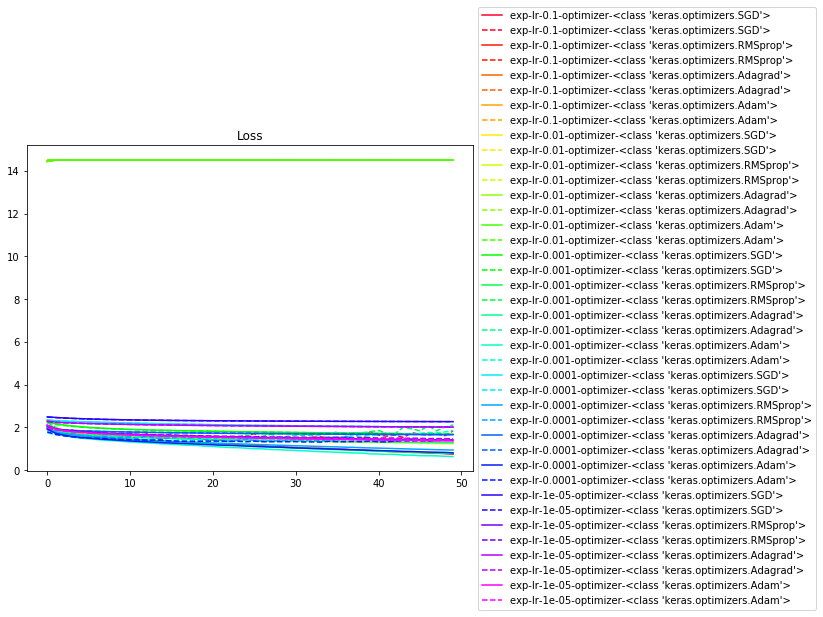

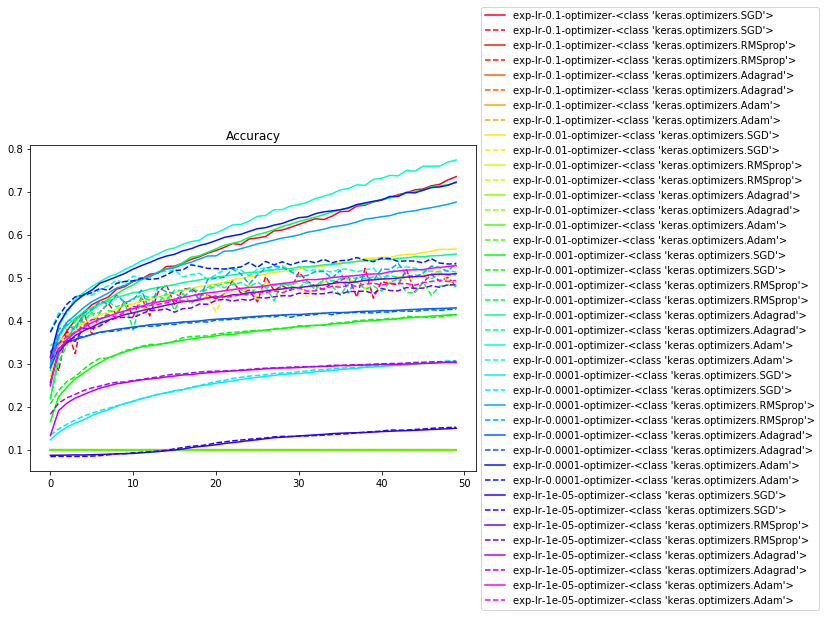

'\n將實驗結果繪出\n'

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

"""
將實驗結果繪出
"""